# Import

In [1]:
import numpy as np
import pandas as pd
import pickle
import math

In [2]:
!pip install unidecode

In [3]:
from bs4 import BeautifulSoup
import unidecode
import spacy
nlp = spacy.load("en_core_web_sm")
import re

In [4]:
import nltk
from nltk.stem import WordNetLemmatizer

In [5]:
import matplotlib.pyplot as plt

In [6]:
from wordcloud import WordCloud

In [7]:
# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

# Data Read


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
with open("/content/drive/MyDrive/IR_assignment_3/df_short.pkl", 'rb') as file:
  df_core = pickle.load(file)

In [ ]:
df_core.head()

,overall,reviewerID,asin,reviewText,reviewTime
0,5.0,AAP7PPBU72QFM,0151004714,This is the best novel I have read in 2 or 3 y...,"09 18, 1999"
1,3.0,A2E168DTVGE6SV,0151004714,"Pages and pages of introspection, in the style...","10 23, 2013"
2,5.0,A1ER5AYS3FQ9O3,0151004714,This is the kind of novel to read when you hav...,"09 2, 2008"
3,5.0,A1T17LMQABMBN5,0151004714,What gorgeous language! What an incredible wri...,"09 4, 2000"
4,3.0,A3QHJ0FXK33OBE,0151004714,I was taken in by reviews that compared this b...,"02 4, 2000"


In [ ]:
with open("/content/drive/MyDrive/IR_assignment_3/dfmeta_short.pkl", 'rb') as file:
  df_meta = pickle.load(file)

In [ ]:
df_meta.head()

,title,asin,date,brand
0,Genuine Geovision 1 Channel 3rd Party NVR IP S...,0011300000,"January 28, 2014",GeoVision
1,"Books ""Handbook of Astronomical Image Processi...",0043396828,"June 17, 2003",33 Books Co.
2,One Hot Summer,0060009810,,Visit Amazon's Carolina Garcia Aguilera Page
3,Hurray for Hattie Rabbit: Story and pictures (...,0060219602,,Visit Amazon's Dick Gackenbach Page
4,sex.lies.murder.fame.: A Novel,0060786817,,Visit Amazon's Lolita Files Page


In [ ]:
with open("/content/drive/MyDrive/IR_assignment_3/review_df_short.pkl", 'rb') as file:
  df_review = pickle.load(file)

In [ ]:
df_review.head()

,overall,reviewTime,reviewerID,asin,reviewerName,reviewText
0,5.0,"09 18, 1999",AAP7PPBU72QFM,0151004714,D. C. Carrad,This is the best novel I have read in 2 or 3 y...
1,3.0,"10 23, 2013",A2E168DTVGE6SV,0151004714,Evy,"Pages and pages of introspection, in the style..."
2,5.0,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,Kcorn,This is the kind of novel to read when you hav...
3,5.0,"09 4, 2000",A1T17LMQABMBN5,0151004714,Caf Girl Writes,What gorgeous language! What an incredible wri...
4,3.0,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,W. Shane Schmidt,I was taken in by reviews that compared this b...


#Pre-processing

## Meta Data

In [ ]:
df_meta.dropna(subset = ['asin'], inplace = True)
df_meta.drop_duplicates(subset = ['asin'], keep = 'first', inplace = True)

In [ ]:
def findASIN(title):
  if 'headphones' in title.lower():
    return True
  return False

In [ ]:
# Find asins for product
product = "Headphones"

p = product.lower()

df_filter_meta = df_meta[df_meta['title'].apply(findASIN)]

In [ ]:
asin_unique = df_filter_meta['asin'].unique()

In [ ]:
len(asin_unique)

17810

## Core

In [ ]:
df_core['overall'] = pd.to_numeric(df_core['overall'], errors='coerce')
# df_core["reviewTime"] = pd.to_datetime(df_core["reviewTime"], unit='s', errors='coerce')
df_core.dropna(subset = ['asin', 'overall', "reviewText", "reviewTime"], inplace = True)

In [ ]:
df_core.shape

(6738237, 5)

## Review


In [ ]:
df_review['overall'] = pd.to_numeric(df_review['overall'], errors='coerce')
# df_review["reviewTime"] = pd.to_datetime(df_review["reviewTime"], unit='s', errors='coerce')
df_review.dropna(subset = ['asin', 'overall', "reviewText", "reviewTime"], inplace = True)

In [ ]:
df_review.shape

(6738237, 6)

In [ ]:
df_head = df_review[df_review['asin'].isin(asin_unique)]

In [ ]:
print("Number of rows with the product: " + str(df_head.shape[0]))

Number of rows with the product: 264868


In [ ]:
df_head['brand'] = df_head['asin'].map(df_meta.set_index('asin')['brand'])

<ipython-input-27-29fbbd5c49b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head['brand'] = df_head['asin'].map(df_meta.set_index('asin')['brand'])


# Part 4

In [8]:
def rating_converter(rating):
  if rating >= 3:
    return True
  else:
    return False

good = 0
bad = 0
for i in df_head["overall"]:
  if(rating_converter(i)):
    good += 1
  else:
    bad += 1

NameError: name 'df_head' is not defined

In [ ]:
print("Number of reviews: " + str(df_head.shape[0]))
print("Average Rating Score: " + str(df_head["overall"].mean()))
print("Number of Unique Products: " + str(len(df_head["asin"].unique())))
print("Number of Good Ratings: " + str(good))
print("Number of Bad Ratings: " + str(bad))
print("Number of Reviews corresponding to each Rating")
df_head["overall"].value_counts()

Number of reviews: 264868
Average Rating Score: 4.07106936285244
Number of Unique Products: 5393
Number of Good Ratings: 225823
Number of Bad Ratings: 39045
Number of Reviews corresponding to each Rating


overall
5.0    145081
4.0     52937
3.0     27805
1.0     20362
2.0     18683
Name: count, dtype: int64

# Part 5

In [ ]:
acronyms = {
  'NLP': 'Natural Language Processing',
  'AI': 'Artificial Intelligence',
  'CSS': 'Cascading Style Sheets',
  'HTML': 'HyperText Markup Language',
  'URL': 'Uniform Resource Locator',
  'ASAP': 'As Soon As Possible',
  'FYI': 'For Your Information',
  'BTW': 'By the Way',
  'ROI': 'Return on Investment',
  'FAQ': 'Frequently Asked Questions',
  'GUI': 'Graphical User Interface',
  'API': 'Application Programming Interface',
  'UX': 'User Experience',
  'UI': 'User Interface',
  'GDPR': 'General Data Protection Regulation',
  'e.g.': 'For example (Latin: exempli gratia)',
  'i.e.': 'That is (Latin: id est)',
  'RAM': 'Random Access Memory',
  'ROM': 'Read-Only Memory',
  'CPU': 'Central Processing Unit',
  'GPU': 'Graphics Processing Unit',
  'HDD': 'Hard Disk Drive',
  'SSD': 'Solid State Drive',
  'USB': 'Universal Serial Bus',
  'Wi-Fi': 'Wireless Fidelity',
  'LAN': 'Local Area Network',
  'WAN': 'Wide Area Network',
  'IoT': 'Internet of Things',
  'SaaS': 'Software as a Service',
  'PaaS': 'Platform as a Service',
  'IaaS': 'Infrastructure as a Service',
  'CEO': 'Chief Executive Officer',
  'CFO': 'Chief Financial Officer',
  'COO': 'Chief Operating Officer',
  'CMO': 'Chief Marketing Officer',
  'CTO': 'Chief Technology Officer',
  'HR': 'Human Resources',
  'KPI': 'Key Performance Indicator',
  'B2B': 'Business to Business',
  'B2C': 'Business to Consumer',
  'DNA': 'Deoxyribonucleic Acid',
  'RNA': 'Ribonucleic Acid',
  'ATP': 'Adenosine Triphosphate',
  'NASA': 'National Aeronautics and Space Administration',
  'CERN': 'European Organization for Nuclear Research',
  'MRI': 'Magnetic Resonance Imaging',
  'EEG': 'Electroencephalogram',
  'LCD': 'Liquid Crystal Display',
  'LED': 'Light-Emitting Diode',
  'HIV': 'Human Immunodeficiency Virus',
  'AIDS': 'Acquired Immunodeficiency Syndrome',
  'FDA': 'Food and Drug Administration',
  'WHO': 'World Health Organization',
  'CPR': 'Cardiopulmonary Resuscitation',
  'ICU': 'Intensive Care Unit',
  'ER': 'Emergency Room',
  'TBA': 'To Be Announced',
  'TBC': 'To Be Confirmed',
  'RSVP': 'Please Reply',
  'AKA': 'Also Known As',
  'ETA': 'Estimated Time of Arrival',
  'LOL': 'Laugh Out Loud',
  'ROFL': 'Rolling On The Floor Laughing',
  'OS': 'Operating System',
  'CLI': 'Command Line Interface',
  'HTTP': 'Hypertext Transfer Protocol',
  'HTTPS': 'Hypertext Transfer Protocol Secure',
  'FTP': 'File Transfer Protocol',
  'SMTP': 'Simple Mail Transfer Protocol',
  'DNS': 'Domain Name System',
  'VR': 'Virtual Reality',
  'AR': 'Augmented Reality',
  'ML': 'Machine Learning',
  'DL': 'Deep Learning',
  'SME': 'Small and Medium-sized Enterprise',
  'STEM': 'Science, Technology, Engineering, and Mathematics',
  'EMG': 'Electromyography',
  'ECG': 'Electrocardiogram',
  'IG': 'Instagram',
  'FB': 'Facebook',
  'YT': 'YouTube',
  'TW': 'Twitter',
  'DM': 'Direct Message',
  'NSFW': 'Not Safe For Work',
  'HTML5': 'HyperText Markup Language version 5',
  'CSS3': 'Cascading Style Sheets version 3',
  'JS': 'JavaScript',
  'SQL': 'Structured Query Language',
  'JSON': 'JavaScript Object Notation',
  'XML': 'eXtensible Markup Language',
  'HTTPS': 'Hypertext Transfer Protocol Secure',
  'SSL': 'Secure Sockets Layer',
  'TLS': 'Transport Layer Security',
  'API': 'Application Programming Interface',
  'SDK': 'Software Development Kit',
  'CLI': 'Command Line Interface',
  'GUI': 'Graphical User Interface',
  'POS': 'Point of Sale',
  'POSIX': 'Portable Operating System Interface',
  'VPN': 'Virtual Private Network',
  'LAN': 'Local Area Network',
  'WAN': 'Wide Area Network',
  'MAC': 'Media Access Control',
  'DNS': 'Domain Name System',
  'IP': 'Internet Protocol',
  'TCP': 'Transmission Control Protocol',
  'UDP': 'User Datagram Protocol',
  'SSH': 'Secure Shell',
  'SSL': 'Secure Sockets Layer',
  'TLS': 'Transport Layer Security',
  'FTP': 'File Transfer Protocol',
  'SSH': 'Secure Shell',
  'RSA': 'Rivest-Shamir-Adleman',
  'AES': 'Advanced Encryption Standard',
  'VPN': 'Virtual Private Network',
  'TOR': 'The Onion Router',
  'IMAP': 'Internet Message Access Protocol',
  'POP': 'Post Office Protocol',
  'SMTP': 'Simple Mail Transfer Protocol',
  'HTTP': 'Hypertext Transfer Protocol',
  'REST': 'Representational State Transfer',
  'SOAP': 'Simple Object Access Protocol',
  'URL': 'Uniform Resource Locator',
  'URI': 'Uniform Resource Identifier',
  'HTML': 'HyperText Markup Language',
  'XML': 'eXtensible Markup Language',
  'JSON': 'JavaScript Object Notation',
  'YAML': 'YAML Ain\'t Markup Language',
  'CSV': 'Comma-Separated Values',
  'XSS': 'Cross-Site Scripting',
  'CSRF': 'Cross-Site Request Forgery',
  'SQLi': 'SQL Injection',
  'XSS': 'Cross-Site Scripting',
  'CVE': 'Common Vulnerabilities and Exposures',
  'OWASP': 'Open Web Application Security Project',
  'XSRF': 'Cross-Site Request Forgery',
  'BGP': 'Border Gateway Protocol',
  'TCP/IP': 'Transmission Control Protocol/Internet Protocol',
  'SMTP': 'Simple Mail Transfer Protocol',
  'FTP': 'File Transfer Protocol',
  'SSH': 'Secure Shell',
  'SSL': 'Secure Sockets Layer',
  'TLS': 'Transport Layer Security',
  'ARP': 'Address Resolution Protocol',
  'DHCP': 'Dynamic Host Configuration Protocol',
  'ICMP': 'Internet Control Message Protocol',
  'IGMP': 'Internet Group Management Protocol',
  'NAT': 'Network Address Translation',
  'SNMP': 'Simple Network Management Protocol',
  'SMTP': 'Simple Mail Transfer Protocol',
  'NNTP': 'Network News Transfer Protocol',
  'IMAP': 'Internet Message Access Protocol',
  'POP': 'Post Office Protocol',
  'LDAP': 'Lightweight Directory Access Protocol',
  'RDP': 'Remote Desktop Protocol',
  'SSH': 'Secure Shell',
  'Telnet': 'Telecommunication Network',
  'TLS': 'Transport Layer Security',
  'SSL': 'Secure Sockets Layer',
  'WPA': 'Wi-Fi Protected Access',
  'WEP': 'Wired Equivalent Privacy',
  'SSID': 'Service Set Identifier',
  'SSID': 'Service Set Identifier',
  'LAN': 'Local Area Network',
  'WAN': 'Wide Area Network',
  'MAN': 'Metropolitan Area Network',
  'SAN': 'Storage Area Network',
  'CAN': 'Controller Area Network',
  'PAN': 'Personal Area Network',
  'VLAN': 'Virtual Local Area Network',
  'VPN': 'Virtual Private Network',
  'ATM': 'Asynchronous Transfer Mode',
  'DSL': 'Digital Subscriber Line',
  'FDDI': 'Fiber Distributed Data Interface',
  'ISDN': 'Integrated Services Digital Network',
  'Frame Relay': 'Frame Relay',
  'GSM': 'Global System for Mobile Communications',
  'CDMA': 'Code Division Multiple Access',
  'USSD': 'Unstructured Supplementary Service Data',
  'SIM': 'Subscriber Identity Module',
  'IMEI': 'International Mobile Equipment Identity',
  'ICCID': 'Integrated Circuit Card Identifier',
  'LTE': 'Long-Term Evolution',
  'UMTS': 'Universal Mobile Telecommunications System',
  'GPRS': 'General Packet Radio Service',
  'EDGE': 'Enhanced Data rates for GSM Evolution',
  'HSPA': 'High Speed Packet Access',
  'WCDMA': 'Wideband Code Division Multiple Access',
  'TDMA': 'Time Division Multiple Access',
  'SDMA': 'Space Division Multiple Access',
  'FDMA': 'Frequency Division Multiple Access',
  'MIMO': 'Multiple Input Multiple Output',
  'SIMO': 'Single Input Multiple Output',
  'MISO': 'Multiple Input Single Output',
  'SISO': 'Single Input Single Output',
  'TD-LTE': 'Time Division-Long Term Evolution',
  'FDD-LTE': 'Frequency Division Duplex-Long Term Evolution',
  'WLAN': 'Wireless Local Area Network',
  'WPAN': 'Wireless Personal Area Network',
  'WWAN': 'Wireless Wide Area Network',
  'WMAN': 'Wireless Metropolitan Area Network',
  'RFID': 'Radio Frequency Identification',
  'NFC': 'Near Field Communication',
  'Bluetooth': 'Bluetooth',
  'Zigbee': 'Zigbee',
  'Z-Wave': 'Z-Wave',
  'LoRa': 'Long Range',
  'Sigfox': 'Sigfox',
  'NB-IoT': 'Narrowband Internet of Things',
  'WiMAX': 'Worldwide Interoperability for Microwave Access',
  'Li-Fi': 'Light Fidelity',
  'LTE-M': 'Long-Term Evolution for Machines',
  'PRNG': 'Pseudo-Random Number Generator',
  'UUID': 'Universally Unique Identifier',
  'GUID': 'Globally Unique Identifier',
  'SHA': 'Secure Hash Algorithm',
  'MD5': 'Message Digest Algorithm 5',
  'DES': 'Data Encryption Standard',
  'AES': 'Advanced Encryption Standard',
  'RSA': 'Rivest-Shamir-Adleman',
  'ECC': 'Elliptic Curve Cryptography',
  'VPN': 'Virtual Private Network',
  'PGP': 'Pretty Good Privacy',
  'OTR': 'Off-the-Record Messaging',
  'TOR': 'The Onion Router',
  'S/MIME': 'Secure/Multipurpose Internet Mail Extensions',
  'DKIM': 'DomainKeys Identified Mail',
  'DMARC': 'Domain-based Message Authentication, Reporting, and Conformance',
  'SPF': 'Sender Policy Framework',
  'DMARC': 'Domain-based Message Authentication, Reporting, and Conformance',
  'SOCKS': 'Socket Secure',
  'TLS': 'Transport Layer Security',
  'SSL': 'Secure Sockets Layer',
  'WPA': 'Wi-Fi Protected Access',
  'WEP': 'Wired Equivalent Privacy',
  'SSID': 'Service Set Identifier',
  'SSID': 'Service Set Identifier',
}

In [ ]:
import nltk
from nltk.stem import PorterStemmer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

def stem_text(text):
  """
  This function stems a given text using the PorterStemmer algorithm.

  Args:
      text (str): The text to be stemmed.

  Returns:
      str: The stemmed text.
  """
  stemmer = PorterStemmer()
  # Tokenize the text (split into words)
  tokens = text.split()
  # Stem each token
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  # Join the stemmed tokens back into a string
  stemmed_text = " ".join(stemmed_tokens)
  return stemmed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def pre_process(text):
  try:
    # Remove html tags
    soup = BeautifulSoup(text, 'html.parser')
    text1 = soup.get_text()
  except:
    print(text)
  # Removed accented Characters
  text2 = unidecode.unidecode(text1)

  # Expand Acronyms
  for acronym, meaning in acronyms.items():
    text3 = text2.replace(acronym, meaning)

  # Remove special characters
  text4 = ''.join([char for char in text3 if char.isalnum() or char.isspace()])

  # Lemmatize
  tokens = nltk.word_tokenize(text4)
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  text5 = ' '.join(lemmatized_tokens)

  # text5 = stem_text(text4)
  # Text Normalization
  text6 = text5.lower()
  return text6

In [ ]:
df_head["pre_processed"] = df_head["reviewText"].apply(pre_process)

<ipython-input-33-980a0b82117e>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')
<ipython-input-33-980a0b82117e>:4: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')
<ipython-input-34-95465b3092e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head["pre_processed"] = df_head["reviewText"].apply(pre_process)


In [ ]:
with open('pre_processed_stem.pickle', 'wb') as file:
  pickle.dump(df_head, file)

In [10]:
with open('pre_processed_stem.pickle', 'rb') as file:
  df_head = pickle.load(file)

# Part 6

### Top and Least Brands

In [9]:
brand_counts_top = df_head['brand'].value_counts().sort_values(ascending=False).head(20)
print("Top 20 Most Reviewed Brands:")
print(brand_counts_top)

Top 20 Most Reviewed Brands:
brand
Sony              23063
Sennheiser        14497
Bose               9879
Audio-Technica     6521
Bluedio            5301
Panasonic          4961
Mpow               4907
Philips            4738
Etre Jeune         4682
Symphonized        4284
MEE audio          4087
TaoTronics         4082
JVC                4008
Koss               3864
Plantronics        3602
Toysdone           3506
JLAB               3164
SoundPEATS         3052
EldHus             2724
Kidz Gear          2511
Name: count, dtype: int64


In [10]:
brand_counts_least = df_head['brand'].value_counts().sort_values(ascending=True).head(20)
print("Top 20 Least Reviewed Brands:")
print(brand_counts_least)

Top 20 Least Reviewed Brands:
brand
Honda                      2
AIRDRIVES                  3
NOIZY Brands               3
PopClik                    4
California Cable Market    4
EUBUY                      5
Fuji                       5
Alitutumao                 5
Blue House                 5
Kaisi                      5
lexastech                  5
meda one                   5
Innovage                   5
Jiaohong Quan              5
Daioolor                   5
Rockford Fosgate           5
Central.Tech.Gear          5
Audiology                  5
SpongeBob SquarePants      5
Giga Goods                 5
Name: count, dtype: int64


### Most positively reviewed

In [11]:
average_review = df_head.groupby("asin")["overall"].mean()
most_positively_reviewed_brand = average_review.sort_values(ascending=False).head(1)

In [12]:
most_positively_reviewed_brand

asin
B005M7TVR4    5.0
Name: overall, dtype: float64

In [13]:
df_head[df_head["asin"] == most_positively_reviewed_brand.index[0]]["brand"].values[0]

'ARCTIC'

### Count of ratings

In [11]:
def extract_year(text):
  return int(text.split(", ")[1])

df_head["year"] = df_head["reviewTime"].apply(extract_year)

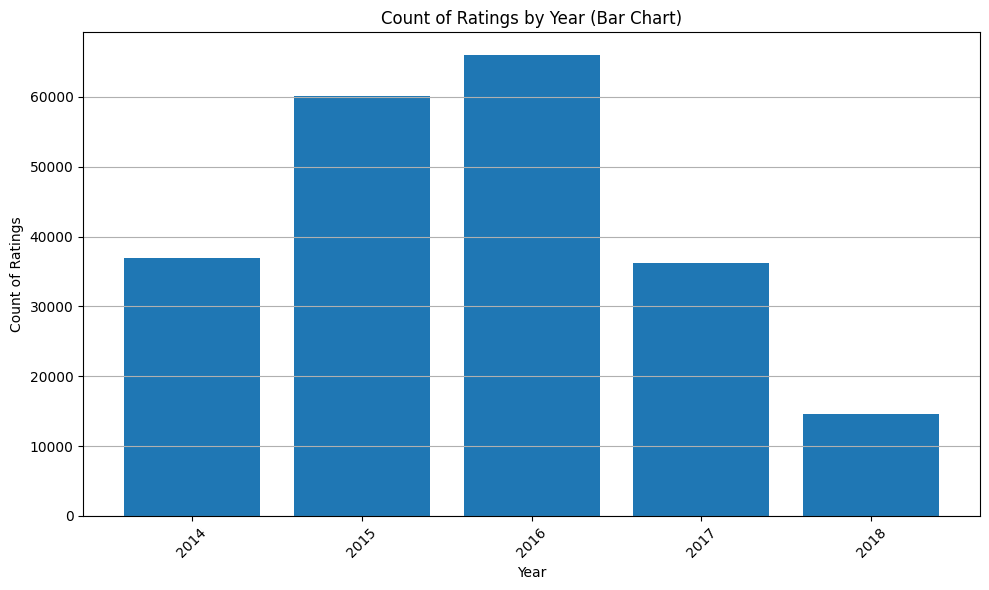

In [14]:
df_5yr = df_head[df_head["year"] >= 2014]
cnt_by_year = df_5yr["year"].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(cnt_by_year.index, cnt_by_year.values)
plt.xlabel("Year")
plt.ylabel("Count of Ratings")
plt.title("Count of Ratings by Year (Bar Chart)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()
plt.show()

### Word Cloud

In [16]:
df_head["gb"] = pd.Series(1 if rating_converter(x) else 0 for x in df_head["overall"])

In [17]:
good = df_head[df_head["gb"] == 1]
bad = df_head[df_head["gb"] == 0]
good_txt = " ".join(good["pre_processed"])
bad_txt = " ".join(bad["pre_processed"])
good_wc = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(good_txt)
bad_wc = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(bad_txt)

Good Reviews


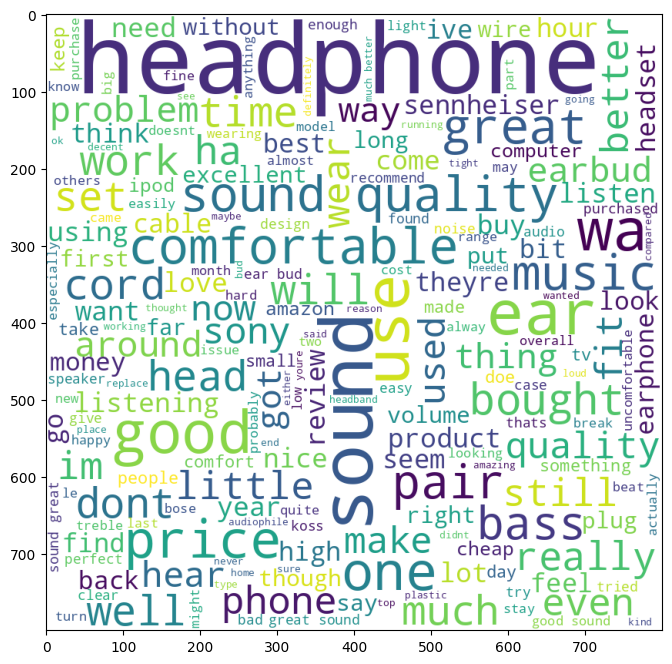

In [18]:
print("Good Reviews")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(good_wc)

Bad Reviews


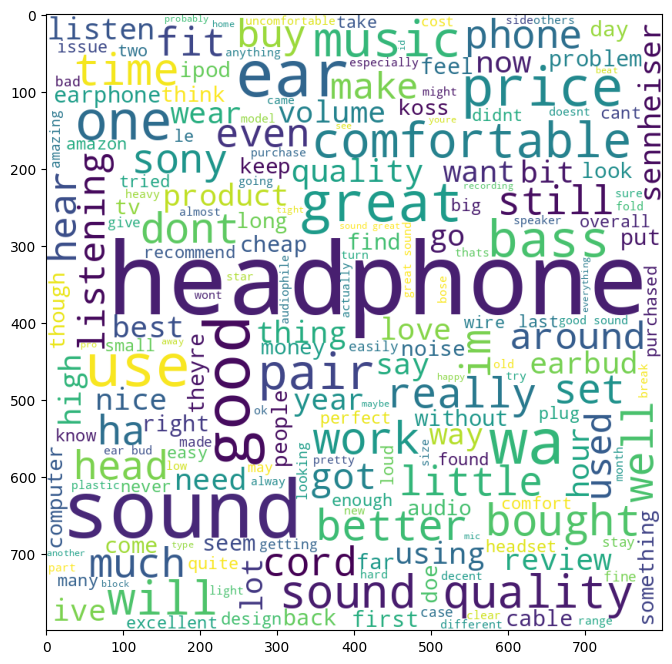

In [19]:
print("Bad Reviews")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(bad_wc)

In [27]:
total_text = " ".join(df_head["pre_processed"])
total_wc = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(good_txt)

Total Reviews


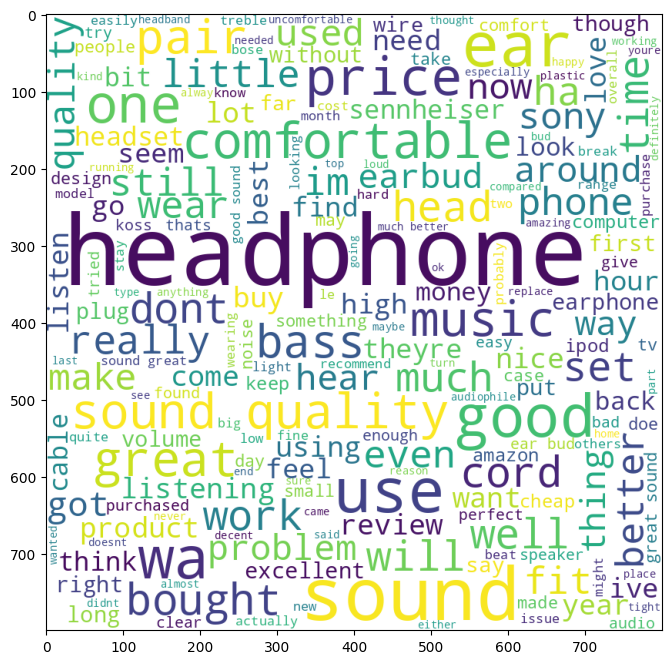

In [28]:
print("Total Reviews")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(total_wc)

### Pie Chart


In [10]:
dist_ratings = df_head.overall.value_counts()

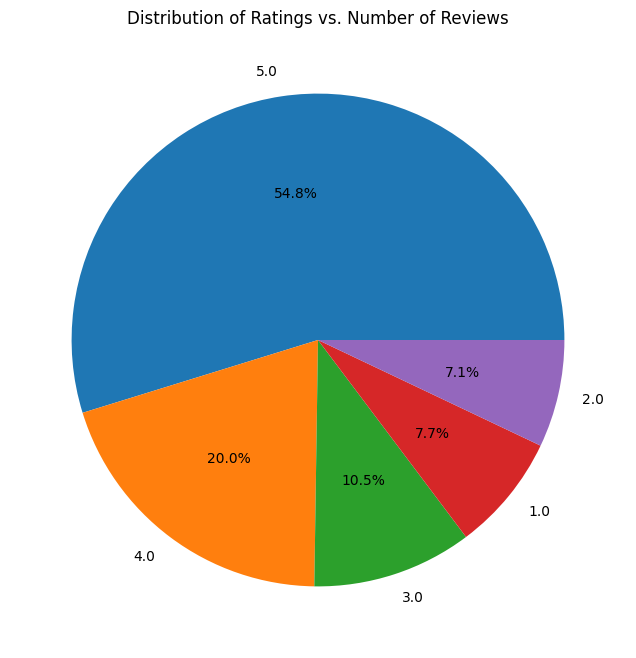

In [11]:
# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(dist_ratings.values, labels=dist_ratings.index, autopct="%1.1f%%")  # Format percentage labels with 1 decimal place
plt.title("Distribution of Ratings vs. Number of Reviews")
plt.show()

### Max Reviews

In [29]:
year_list = df_head.groupby("year").size()
max_year = year_list.idxmax()
print("Year with Maximum Reviews: " + str(max_year))
print("Number of Reviews: " + str(year_list[max_year]))

Year with Maximum Reviews: 2016
Number of Reviews: 65933


### Max Number Of customers

In [30]:
customer_year_list = df_head.groupby("year")["reviewerID"].nunique()

In [31]:
max_cust_year = customer_year_list.idxmax()
print("Year with Maximum Customers: " + str(max_cust_year))
print("Number of Customers: " + str(customer_year_list[max_cust_year]))

Year with Maximum Customers: 2016
Number of Customers: 53583


# Part 7 & 8 & 9


In [12]:
def create_rating_class(rating):
  if rating > 3:
    return 2
  elif rating == 3:
    return 1
  else:
    return 0

In [13]:
df_head["rating_class"] = df_head["overall"].apply(create_rating_class)

In [14]:
df_temp = df_head.sample(frac=0.025, ignore_index=True)

In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_temp["pre_processed"])
X_train, X_test, y_train, y_test = train_test_split(X, df_temp["rating_class"], test_size=0.25, random_state=11)

In [36]:
with open('X.pickle', 'wb') as file:
  pickle.dump(X, file)

with open('X.pickle', 'wb') as file:
  pickle.dump(X, file)

In [15]:
X = []
with open('X.pickle', 'rb') as file:
  X = pickle.load(file)
X_train, X_test, y_train, y_test = train_test_split(X, df_head["rating_class"], test_size=0.25, random_state=11)

# Part 10

In [16]:
def run_model(model, name, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print("======================================")
  print(name)
  print("======================================")
  print(classification_report(y_pred, y_test))
  print("======================================")

In [ ]:
model = DecisionTreeClassifier()
run_model(model, "Decision Tree", X_train, X_test, y_train, y_test)

Decision Tree
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      9487
           1       0.24      0.28      0.26      6051
           2       0.88      0.86      0.87     50679

    accuracy                           0.76     66217
   macro avg       0.54      0.55      0.54     66217
weighted avg       0.77      0.76      0.76     66217



In [ ]:
model = AdaBoostClassifier()
run_model(model, "Ada Boost", X_train, X_test, y_train, y_test)

Ada Boost
              precision    recall  f1-score   support

           0       0.41      0.66      0.51      6079
           1       0.07      0.43      0.12      1166
           2       0.97      0.81      0.89     58972

    accuracy                           0.79     66217
   macro avg       0.48      0.63      0.51     66217
weighted avg       0.90      0.79      0.84     66217



In [18]:
model = KNeighborsClassifier()
run_model(model, "K Nearest Neighbours", X_train, X_test, y_train, y_test)

K Nearest Neighbours
              precision    recall  f1-score   support

           0       0.11      0.37      0.17        70
           1       0.08      0.23      0.11        56
           2       0.95      0.78      0.86      1530

    accuracy                           0.74      1656
   macro avg       0.38      0.46      0.38      1656
weighted avg       0.89      0.74      0.80      1656



In [17]:
model = GaussianNB()
run_model(model, "Gaussian Naive Bayes", X_train.toarray(), X_test.toarray(), y_train, y_test)

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.19      0.23      0.21       194
           1       0.46      0.12      0.19       658
           2       0.50      0.78      0.61       804

    accuracy                           0.45      1656
   macro avg       0.38      0.38      0.34      1656
weighted avg       0.45      0.45      0.40      1656



In [ ]:
model = MultinomialNB()
run_model(model, "Multinomial Naive Bayes", X_train, X_test, y_train, y_test)

Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      9219
           1       0.13      0.39      0.19      2239
           2       0.95      0.86      0.90     54759

    accuracy                           0.81     66217
   macro avg       0.56      0.63      0.57     66217
weighted avg       0.87      0.81      0.84     66217



# Part 11

### Create User-item Matrix

In [20]:
df_smolu = df_head[df_head['year'].isin([2005, 2006, 2007])]

In [21]:
# Using pivot table with aggregation function
rating_matrix = df_smolu.pivot_table(values='overall', index='reviewerID', columns='asin')
# rating_matrix.fillna(0, inplace = True)
rating_matrix

asin,B000001OMI,B00000DMA3,B00000JCTD,B00001OPK7,B00001P4XA,B00001P4ZH,B00001P505,B00001W0D4,B00001W0D5,B00001W0DC,...,B000XG3QCU,B000YHWVRO,B0018VDADE,B00193FT26,B002LK2QJK,B0030XXH1S,B003CJTR8C,B003CJTR8M,B00WU35S7K,B01DMHPT3U
reviewerID,,,,,,,,,,,,,,,,,,,,,
A1007OOXKZK6ZR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1009BUD60IYKK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1018ZW6IPSI7Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A103KP5IOW1SFI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1076PTK36UDX2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZPEN64PTBL74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZPJ04CZIXWTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZQSLT9YQPHRV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
with open('ratings.pickle', 'wb') as file:
  pickle.dump(rating_matrix, file)

with open('ratings.pickle', 'wb') as file:
  pickle.dump(rating_matrix, file)

### Normalize

In [22]:
# Apply min-max scaling to each row (user) of the matrix
for index, row in rating_matrix.iterrows():
  # Find the minimum and maximum ratings for the current user's reviews
  min_rating = row.min()
  max_rating = row.max()

  # Skip rows with no ratings (all NaN)
  if pd.isna(min_rating):
    continue

  # Apply min-max scaling to the user's ratings (in-place)
  row = (row - min_rating) / (max_rating - min_rating)
  rating_matrix.loc[index] = row

In [23]:
rating_matrix.fillna(0, inplace = True)

### Top N

In [24]:
def cosine_similarity_manual(array1, array2):
  dot_product = np.dot(array1.T, array2)

  norm_array1 = np.linalg.norm(array1)
  norm_array2 = np.linalg.norm(array2)

  similarity_score = dot_product / (norm_array1 * norm_array2)
  return similarity_score

In [25]:
def find_topN(user, train_set, N):
  row = user.values.reshape(-1, 1)

  train_val = train_set.values

  cos_sim = []
  for us_val in train_val:
    cos_sim.append(cosine_similarity_manual(row, us_val)[0])

  cos_sim = np.array(cos_sim)
  topN = cos_sim.argsort()[-N:]

  return topN

### K Folds

In [26]:
def get_mae(true, pred):
  val = true - pred
  abs_val = np.abs(val)
  mae = np.mean(abs_val)

  return mae

In [27]:
def mae_calculator(rating_matrix, n):
  all_mae = []

  kf = KFold(n_splits=5, shuffle=True, random_state=23)

  for train_index, val_index in kf.split(rating_matrix):
      current_mae = []
      train_data = rating_matrix.iloc[train_index]
      val_data = rating_matrix.iloc[val_index]

      for index,row in val_data.iterrows():
          top_n = find_topN(row, train_data, n)

          top_n = train_data.iloc[top_n]

          val1 = val_data.loc[index]
          val2 = np.mean(top_n, axis = 0)
          current_mae.append(get_mae(val1, val2))

      all_mae.append(np.mean(current_mae))
  return np.mean(all_mae)

In [28]:
# Test with different K values for similar users
k_neighbors_list = [10, 20, 30, 40, 50]
user_mae = []
for k_neighbors in k_neighbors_list:
  mae = mae_calculator(rating_matrix.copy(), k_neighbors)
  user_mae.append(mae)
  print(f"MAE for K={k_neighbors} similar users: {mae}")

<ipython-input-24-f0281d31f29e>:7: RuntimeWarning: invalid value encountered in divide
  similarity_score = dot_product / (norm_array1 * norm_array2)


MAE for K=10 similar users: 0.0005251875663042019
MAE for K=20 similar users: 0.0005586874219692478
MAE for K=30 similar users: 0.0006650833194292905
MAE for K=40 similar users: 0.0006797087000827435
MAE for K=50 similar users: 0.0006881384605817375


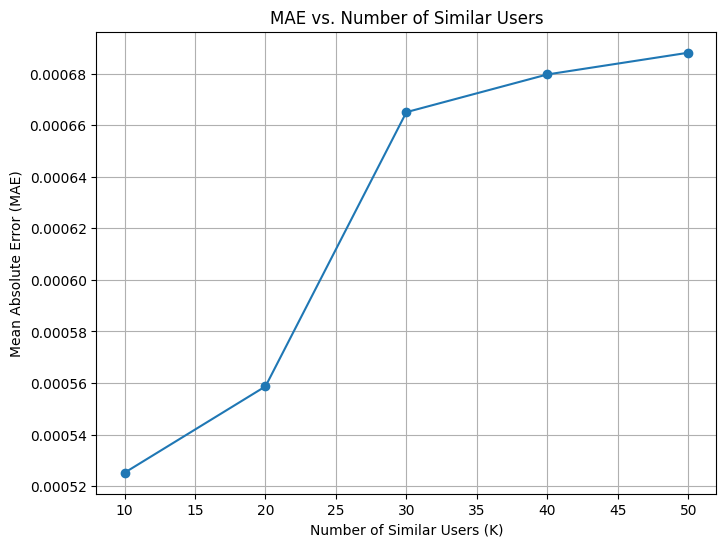

In [30]:
# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.plot(k_neighbors_list, user_mae, marker='o', linestyle='-')
plt.xlabel('Number of Similar Users (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Similar Users')
plt.grid(True)

### Item-Item

In [31]:
# Test with different K values for similar users
k_neighbors_list = [10, 20, 30, 40, 50]
item_mae = []
for k_neighbors in k_neighbors_list:
  mae = mae_calculator(rating_matrix.T, k_neighbors)
  item_mae.append(mae)
  print(f"MAE for K={k_neighbors} similar items: {mae}")

<ipython-input-24-f0281d31f29e>:7: RuntimeWarning: invalid value encountered in divide
  similarity_score = dot_product / (norm_array1 * norm_array2)


MAE for K=10 similar items: 0.00044123782980138475


<ipython-input-24-f0281d31f29e>:7: RuntimeWarning: invalid value encountered in divide
  similarity_score = dot_product / (norm_array1 * norm_array2)


MAE for K=20 similar items: 0.0004596435542870266


<ipython-input-24-f0281d31f29e>:7: RuntimeWarning: invalid value encountered in divide
  similarity_score = dot_product / (norm_array1 * norm_array2)


MAE for K=30 similar items: 0.0005409946867921376


<ipython-input-24-f0281d31f29e>:7: RuntimeWarning: invalid value encountered in divide
  similarity_score = dot_product / (norm_array1 * norm_array2)


MAE for K=40 similar items: 0.0005229564542129131


<ipython-input-24-f0281d31f29e>:7: RuntimeWarning: invalid value encountered in divide
  similarity_score = dot_product / (norm_array1 * norm_array2)


MAE for K=50 similar items: 0.0004994999202198651


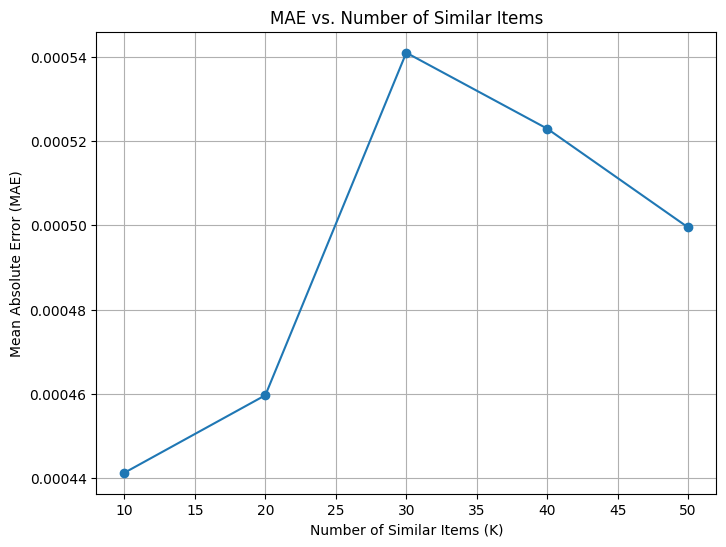

In [32]:
# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.plot(k_neighbors_list, item_mae, marker='o', linestyle='-')
plt.xlabel('Number of Similar Items (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Similar Items')
plt.grid(True)

### Part 12

In [33]:
top10 = df_head.groupby('asin')["overall"].sum().sort_values(ascending=False)
print("Top 10 products sorted by user sum Ratings:")
print(top10[:10])

Top 10 products sorted by user sum Ratings:
asin
B004WODP20    13295.0
B00BN0N0LW    13242.0
B00LP6CFEC    10454.0
B00JJ2C0S0     9775.0
B00004T8R2     7392.0
B003LPTAYI     7313.0
B008EPW1MI     6684.0
B00NBEWB4U     6425.0
B000ULAP4U     6179.0
B0007NWL70     5471.0
Name: overall, dtype: float64
